In [1]:
#ANNALYSE DE DONNEES AVEC PYTHON
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy.stats as st

#SERIE TEMPORELLE AVEC statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import *

from pandas.tseries.offsets import MonthEnd

#CALCUL DE METRICS OU PRECISON DU MODEL
from sklearn.metrics import mean_absolute_error, mean_squared_error

#GESTION DES AVERTISSEMENTS
import warnings
warnings.filterwarnings('ignore')
import scipy

#Data

In [2]:
data = pd.read_csv("/content/sample_data/energie.csv", sep=";")
fichier = "/content/sample_data/energie.csv"
data = pd.read_csv(fichier, sep=";")
data=data.query('Territoire=="France"')
data.head()

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data1 = data.select_dtypes(include=numerics)
data1

,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,57177,42811.0,5399,741.0,691,3967,6741,1587,125,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,54419,38661.0,8721,2511.0,1309,4901,5244,1123,216,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,48583,37549.0,5276,1435.0,666,3175,3894,977,356,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,44192,33100.0,3484,1655.0,486,1343,5302,1572,329,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,40433,29058.0,1772,854.0,368,549,7706,974,454,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,40555,28449.0,1605,54.0,159,1392,5626,2295,1686,892,32959,7268.0,9252.0,2080.0,1907.0,1316.0,2090.0,1353.0,NaN
1357,39162,29010.0,957,70.0,166,720,4408,2213,1713,857,31184,7600.0,9266.0,1698.0,1878.0,1837.0,2090.0,1393.0,NaN
1370,38505,29001.0,2197,498.0,146,1552,3417,1651,1421,815,32350,5764.0,2118.0,6126.0,1114.0,1433.0,2126.0,1468.0,NaN
1383,41695,30658.0,3621,600.0,180,2840,3092,2807,703,812,36762,4291.0,2745.0,4155.0,464.0,861.0,2141.0,1873.0,NaN


In [4]:
data1.corr(method="pearson")["Consommation totale"].sort_values(ascending=False)

Consommation totale                         1.000000
Production totale                           0.957871
Production nucléaire                        0.856117
Production thermique totale                 0.845884
Production thermique gaz                    0.760707
Production thermique charbon                0.498396
Echanges avec la Suisse                     0.492774
Echanges import                             0.490140
Production éolien                           0.430462
Production thermique fioul                  0.393745
Production hydraulique                      0.334905
Echanges avec l'Italie                      0.182509
Production bioénergies                      0.087580
Echanges export                            -0.141436
Echanges avec le Royaume-Uni               -0.277523
Echanges avec l'Espagne                    -0.411741
Solde exportateur                          -0.438498
Production solaire                         -0.682299
Echanges avec l'Allemagne et la Belgique   -0.

<Axes: >

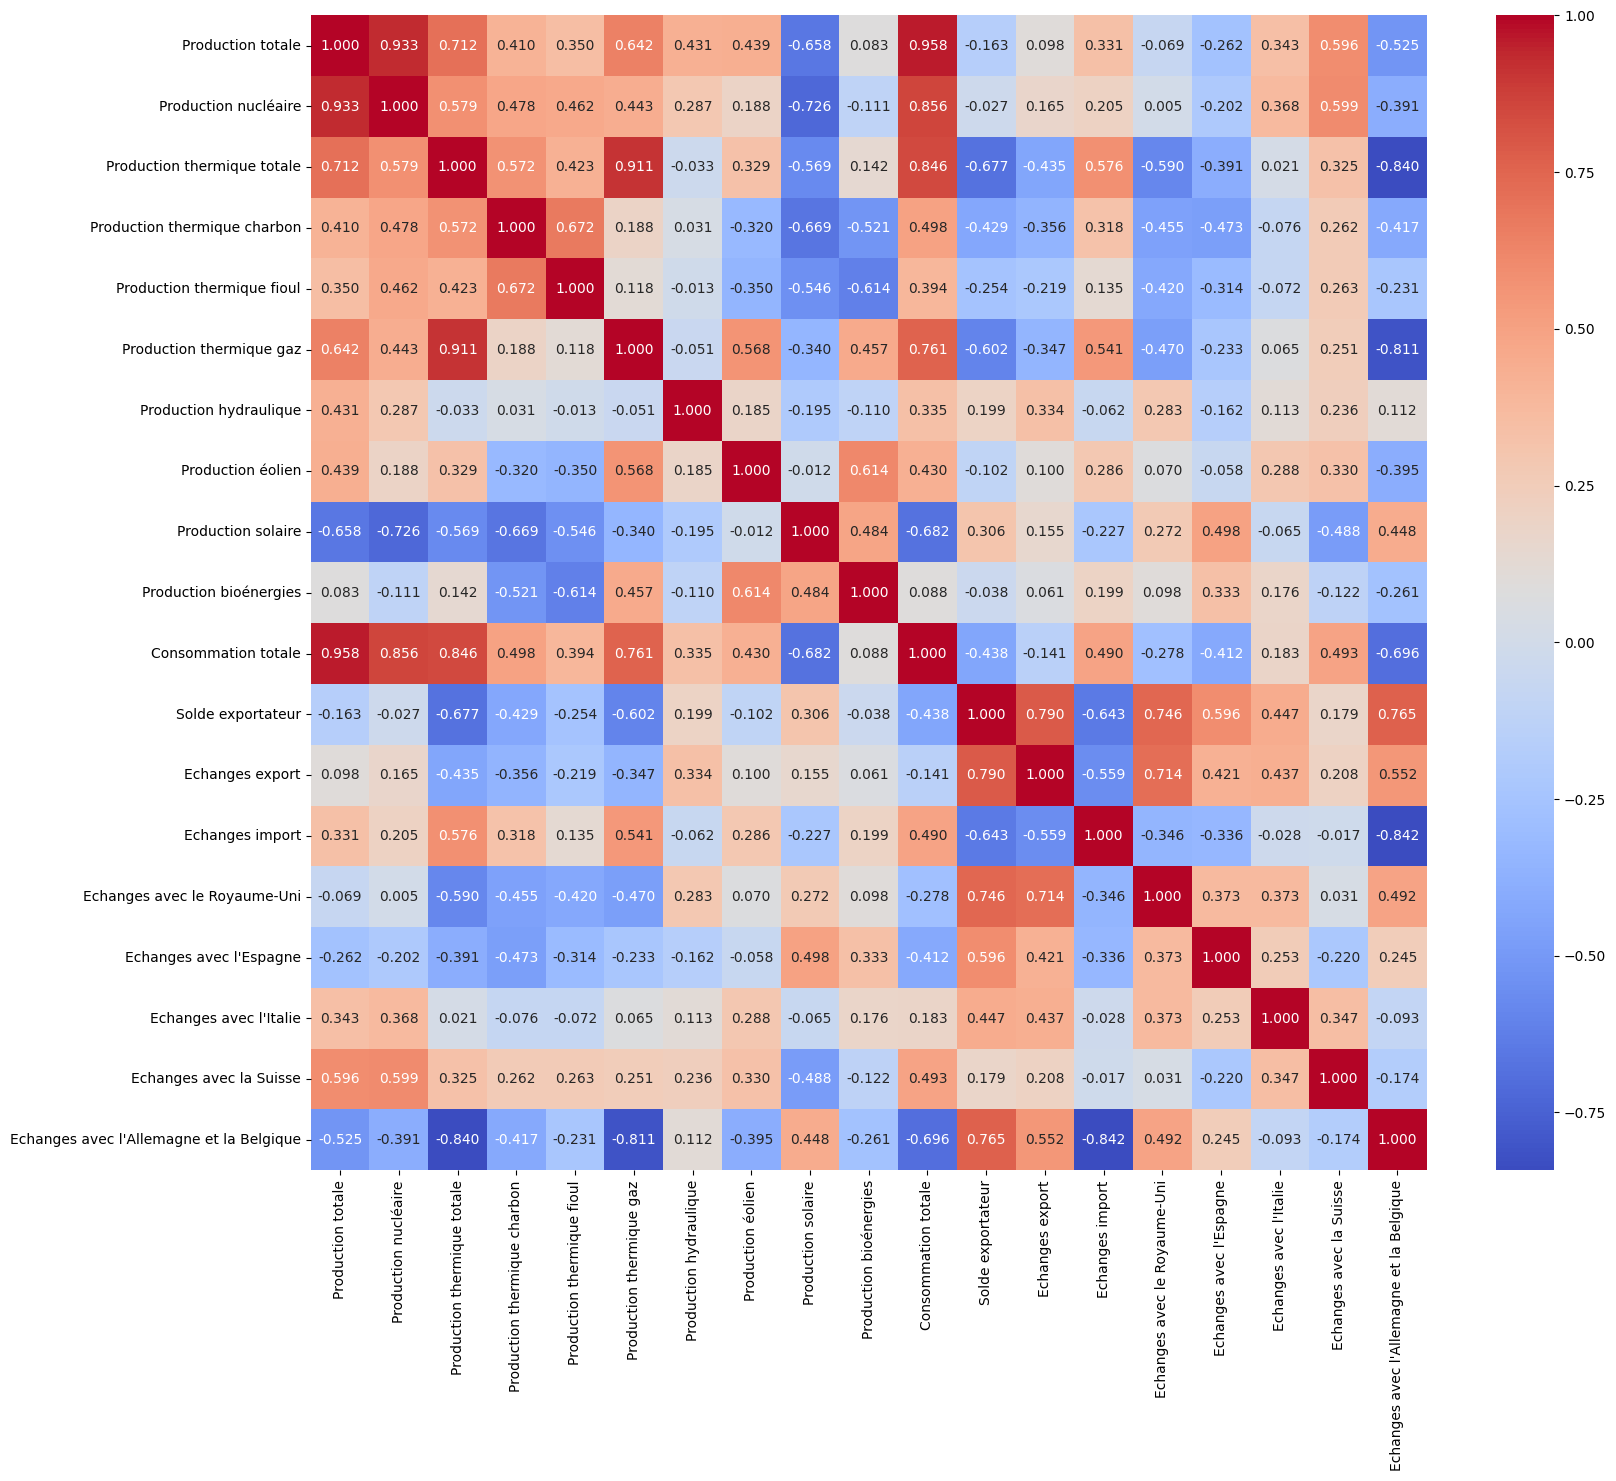

In [5]:
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(data1.corr(),annot=True,fmt="1.3f",cmap='coolwarm')

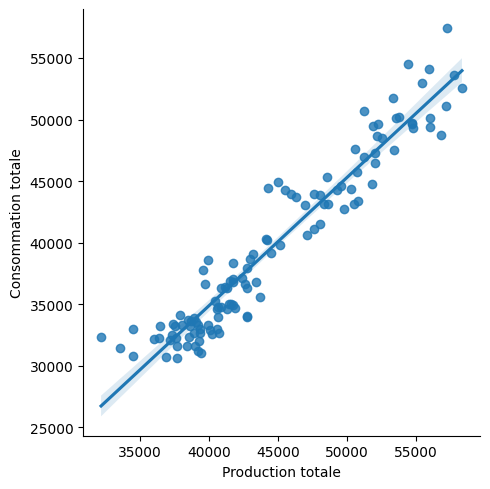

In [6]:
sns.lmplot(x="Production totale",y="Consommation totale",order=1,data=data)

In [7]:
data[data.duplicated()]

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique


In [8]:
data.describe()

,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.00000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,106.000000
mean,44541.865546,32282.210084,3391.369748,700.462185,255.092437,2434.97479,5332.899160,2079.966387,744.605042,708.630252,39613.798319,4214.050420,6868.848739,2728.403361,933.630252,578.831933,1466.142857,1145.957983,163.660377
std,6476.947895,4720.512783,1812.887069,649.748175,152.975294,1511.00431,1405.164822,1025.144330,429.339623,119.253601,7050.614648,2020.730539,1376.199419,1096.980821,478.982995,691.698380,418.114498,595.225244,1267.124686
min,32171.000000,21334.000000,612.000000,7.000000,96.000000,419.00000,2581.000000,728.000000,125.000000,405.000000,30622.000000,-950.000000,2118.000000,-1111.000000,-798.000000,-1005.000000,341.000000,-322.000000,-2912.000000
25%,39351.500000,29015.000000,1996.500000,164.000000,164.000000,1080.50000,4030.000000,1333.500000,411.000000,633.500000,33267.500000,3211.500000,6079.500000,2095.000000,730.000000,81.500000,1200.500000,670.500000,-574.000000
50%,42722.000000,31171.000000,3055.000000,548.000000,213.000000,2359.00000,5302.000000,1714.000000,675.000000,745.000000,37063.000000,4355.000000,7042.000000,2531.000000,1011.000000,521.000000,1514.000000,1188.000000,183.000000
75%,50362.000000,35943.000000,4831.000000,997.000000,288.000000,3386.00000,6495.000000,2594.500000,1056.500000,805.000000,44653.500000,5689.500000,7855.500000,3406.000000,1273.000000,1073.500000,1776.000000,1577.000000,933.250000
max,58310.000000,43792.000000,8721.000000,2833.000000,1309.000000,5910.00000,8607.000000,5902.000000,1713.000000,892.000000,57406.000000,7928.000000,9468.000000,6126.000000,1907.000000,2021.000000,2272.000000,2235.000000,2642.000000


<Axes: ylabel='Density'>

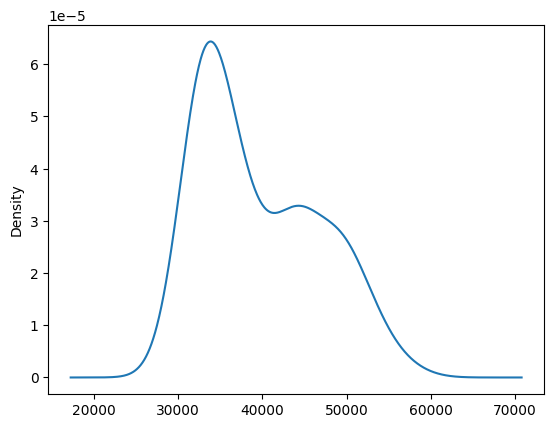

In [9]:
data["Consommation totale"].plot(kind="density")

In [10]:
data.isna().sum()

Mois                                         0
Qualité                                      0
Territoire                                   0
Production totale                            0
Production nucléaire                         0
Production thermique totale                  0
Production thermique charbon                 0
Production thermique fioul                   0
Production thermique gaz                     0
Production hydraulique                       0
Production éolien                            0
Production solaire                           0
Production bioénergies                       0
Consommation totale                          0
Solde exportateur                            0
Echanges export                              0
Echanges import                              0
Echanges avec le Royaume-Uni                 0
Echanges avec l'Espagne                      0
Echanges avec l'Italie                       0
Echanges avec la Suisse                      0
Echanges avec

In [11]:
data

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,2021-07,Données consolidées,France,40555,28449.0,1605,54.0,159,1392,5626,...,892,32959,7268.0,9252.0,2080.0,1907.0,1316.0,2090.0,1353.0,NaN
1357,2021-08,Données consolidées,France,39162,29010.0,957,70.0,166,720,4408,...,857,31184,7600.0,9266.0,1698.0,1878.0,1837.0,2090.0,1393.0,NaN
1370,2021-09,Données consolidées,France,38505,29001.0,2197,498.0,146,1552,3417,...,815,32350,5764.0,2118.0,6126.0,1114.0,1433.0,2126.0,1468.0,NaN
1383,2021-10,Données consolidées,France,41695,30658.0,3621,600.0,180,2840,3092,...,812,36762,4291.0,2745.0,4155.0,464.0,861.0,2141.0,1873.0,NaN


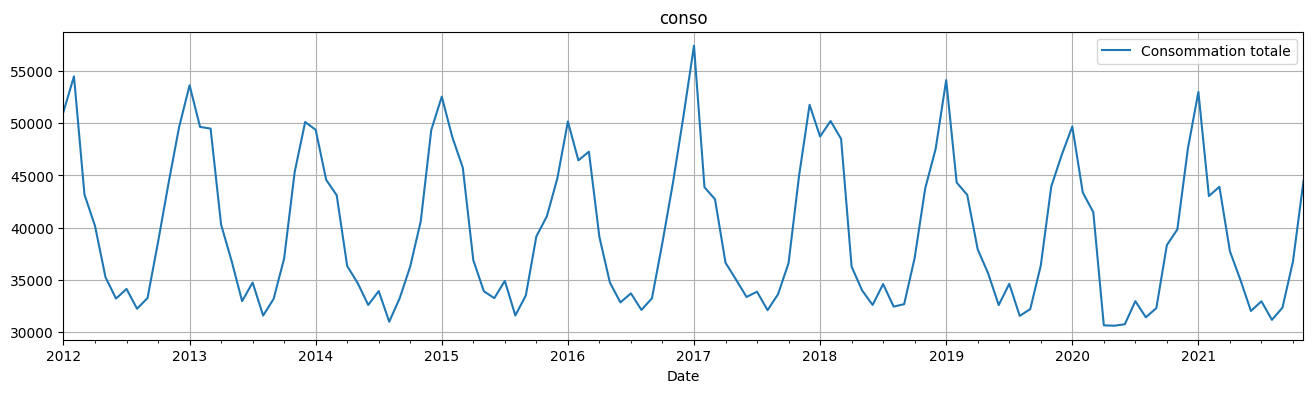

In [12]:
# Ajout du dernier jour du mois
from pandas.tseries.offsets import MonthEnd
energie = data[["Mois","Consommation totale"]]
energie.rename(columns={'Mois':'Date'}, inplace = True)
energie["Date"] = pd.to_datetime(energie["Date"]) + MonthEnd()

# Visualisation de la consomation
energie.set_index('Date').plot(figsize=(16,4));
plt.title("conso")
plt.grid()
plt.show()

In [13]:
energie

,Date,Consommation totale
0,2012-01-31,51086
1,2012-02-29,54476
2,2012-03-31,43156
3,2012-04-30,40176
4,2012-05-31,35257
...,...,...
1344,2021-07-31,32959
1357,2021-08-31,31184
1370,2021-09-30,32350
1383,2021-10-31,36762


Les statistiques descriptives des données (moyenne, médiane, valeur minimale, valeur maximale, écartype) nous permet d'avoir une idée sur le niveau du risque et l'évolution de ces données au cours du temps. Les coefficients « Skewness », « Kurtosis » et la statistique du test de « Jarque-Bera » nous permet de tester la normalité des séries étudiées.

En effet, le coefficient « Kurtosis » est un coefficient qui mesure le degré d'aplatissement de la distribution. Lorsqu'il est égal à 3, la distribution suit donc la loi normale. En revanche, un coefficient inférieur à 3 indique que la distribution est plus aplatie que la loi normale (platykurtique), alors qu'un coefficient de Kurtosis supérieur à 3 indique que la distribution est pointue (leptokurtique).

Le coefficient de « Skewness » est un coefficient qui mesure le degré d'asymétrie de la distribution. Lorsque ce coefficient est négatif, la distribution est asymétrique vers la gauche, lorsqu'il est positif, la distribution est asymétrique vers la droite, alors que lorsqu'il est nul cela signifie que la distribution est symétrique et elle suit la loi normale.

In [14]:
data1.skew()

Production totale                           0.457785
Production nucléaire                        0.389066
Production thermique totale                 0.558537
Production thermique charbon                1.192061
Production thermique fioul                  3.431375
Production thermique gaz                    0.458457
Production hydraulique                      0.002878
Production éolien                           1.157955
Production solaire                          0.620582
Production bioénergies                     -0.687575
Consommation totale                         0.577872
Solde exportateur                          -0.609266
Echanges export                            -0.791016
Echanges import                             0.345034
Echanges avec le Royaume-Uni               -1.088974
Echanges avec l'Espagne                    -0.048473
Echanges avec l'Italie                     -0.453766
Echanges avec la Suisse                    -0.332135
Echanges avec l'Allemagne et la Belgique   -0.

In [15]:
data1.kurtosis()

Production totale                           -0.914855
Production nucléaire                        -0.143313
Production thermique totale                 -0.303378
Production thermique charbon                 1.089451
Production thermique fioul                  18.968801
Production thermique gaz                    -0.775125
Production hydraulique                      -1.037124
Production éolien                            1.126603
Production solaire                          -0.648896
Production bioénergies                      -0.520331
Consommation totale                         -0.914202
Solde exportateur                            0.100690
Echanges export                              0.980383
Echanges import                              1.158817
Echanges avec le Royaume-Uni                 1.644734
Echanges avec l'Espagne                     -0.608148
Echanges avec l'Italie                      -0.238860
Echanges avec la Suisse                     -0.608293
Echanges avec l'Allemagne et

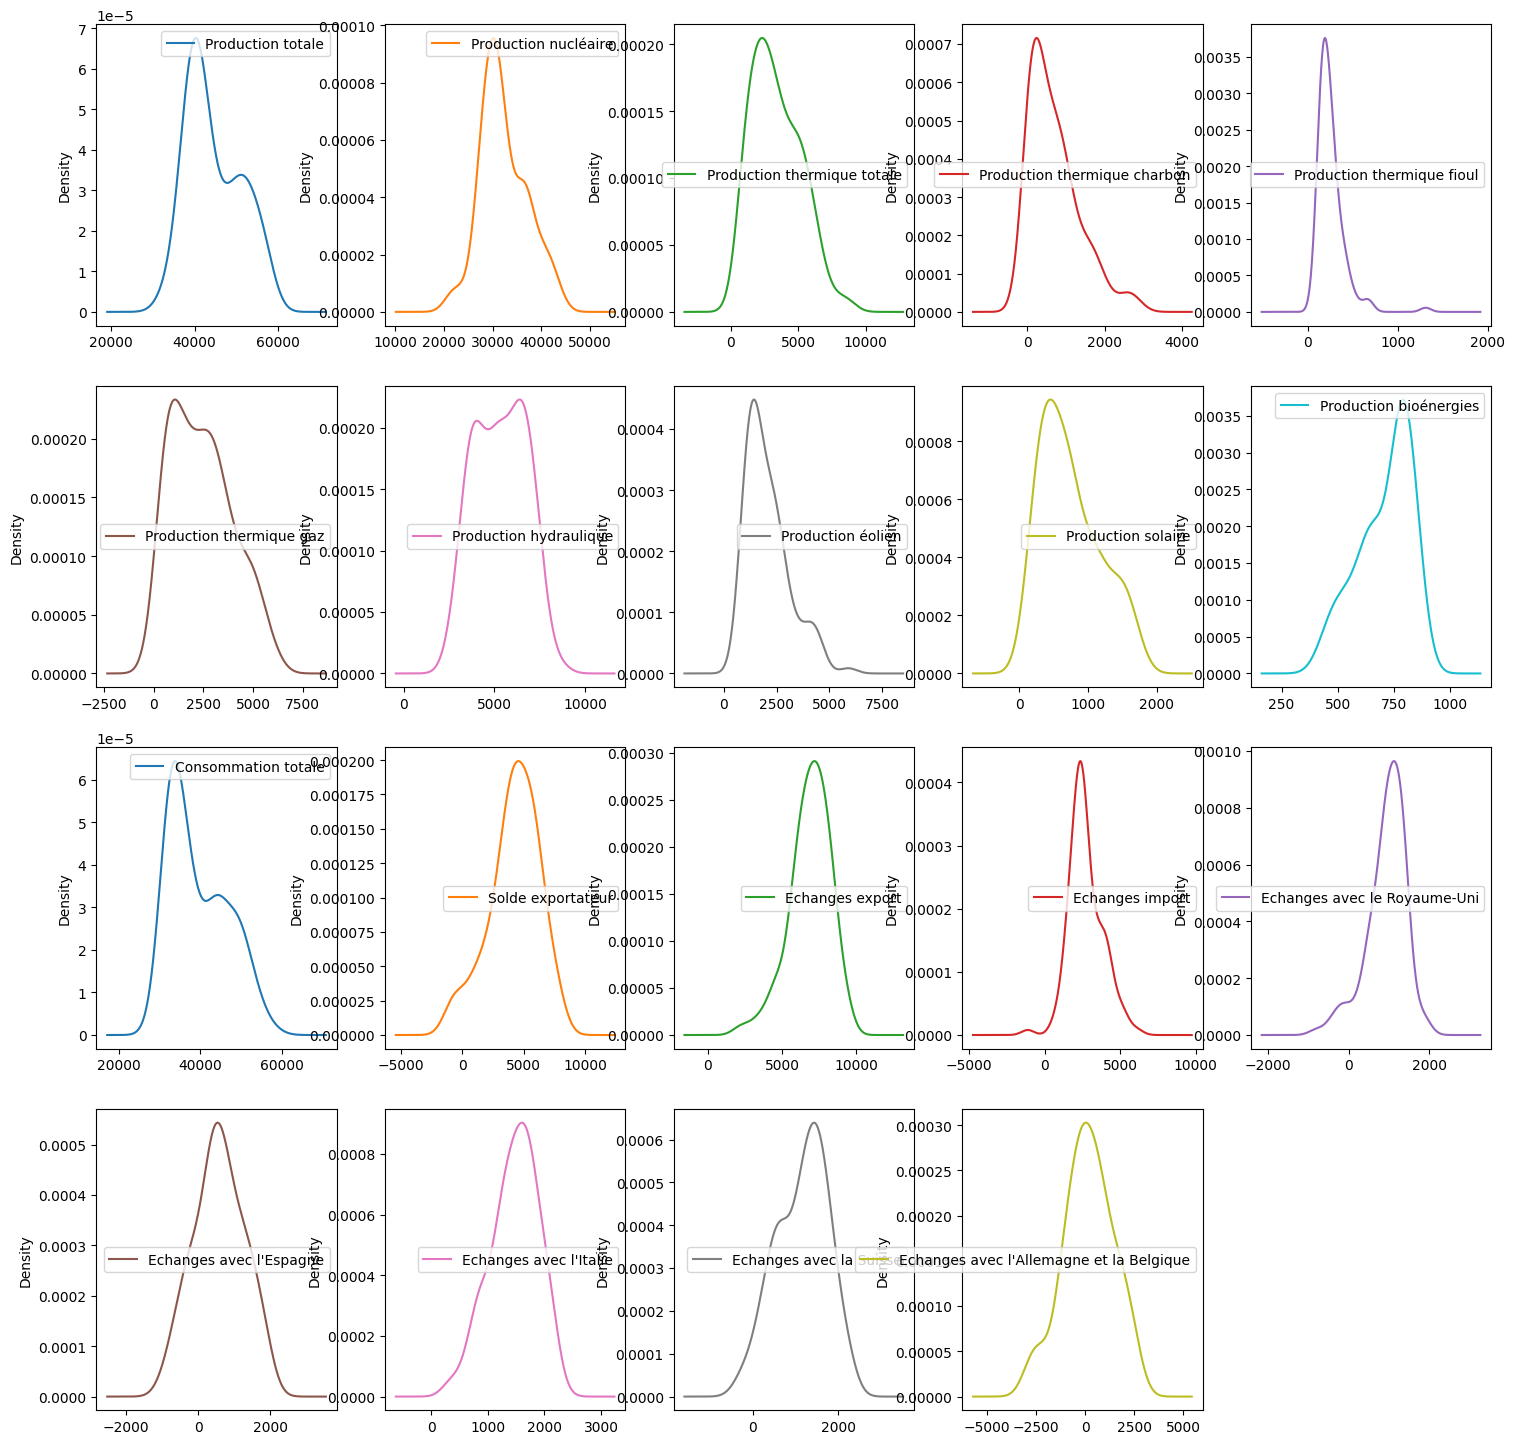

In [16]:
data.plot(kind='density',
        subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(18,18))
plt.show()

#Outliers

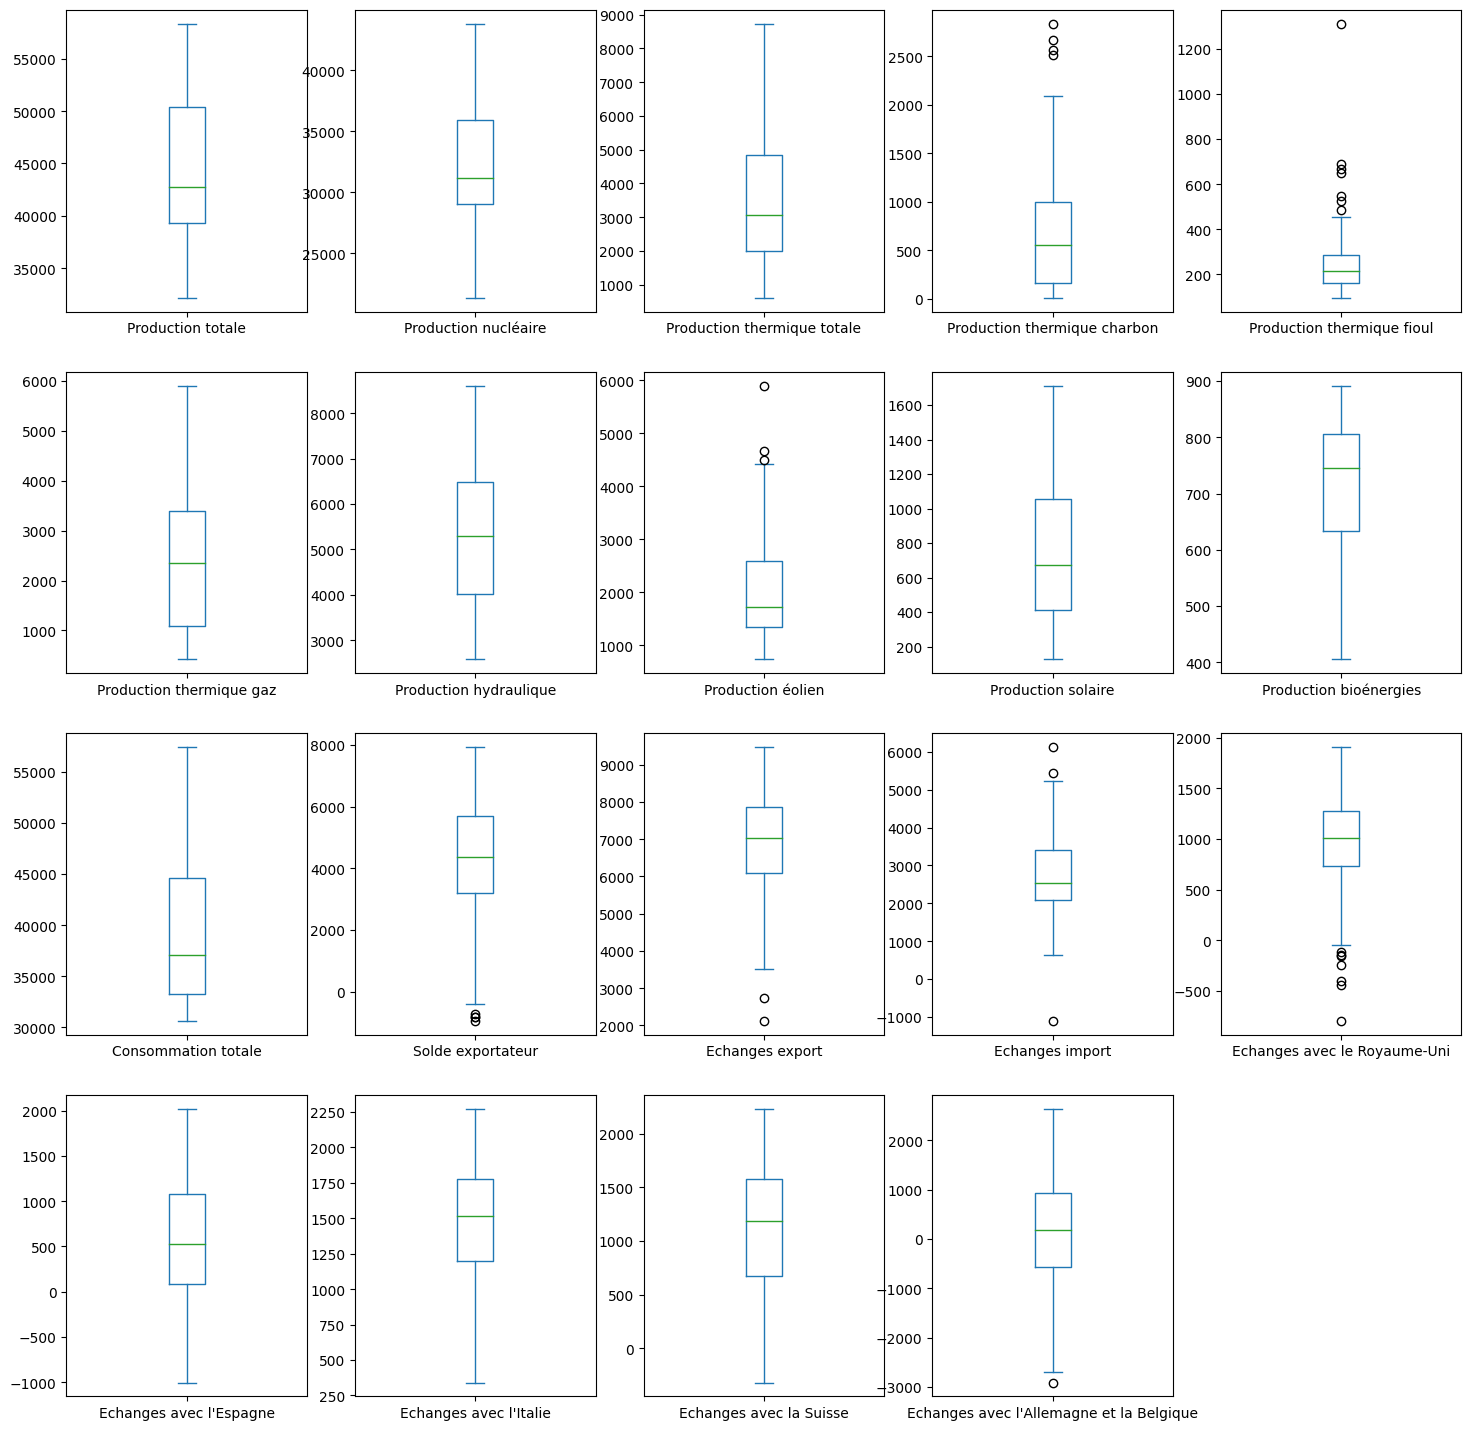

In [17]:
data.plot(kind='box',
        subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(18,18))
plt.show()

In [18]:
data=data.select_dtypes(include=['number']).copy()
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers_count = ((data > Q3 + 1.5 * IQR) | (data < Q1 - 1.5 * IQR)).sum()
for col in data.columns:
    print(f"Variable : {col}")
    print(f"Q1 : {Q1[col]}")
    print(f"Q3 : {Q3[col]}")
    print(f"IQR : {IQR[col]}")
    print(f"Nombre de valeurs extrêmes : {outliers_count[col]}")
    print("---------------------------")

Variable : Production totale
Q1 : 39351.5
Q3 : 50362.0
IQR : 11010.5
Nombre de valeurs extrêmes : 0
---------------------------
Variable : Production nucléaire
Q1 : 29015.0
Q3 : 35943.0
IQR : 6928.0
Nombre de valeurs extrêmes : 0
---------------------------
Variable : Production thermique totale
Q1 : 1996.5
Q3 : 4831.0
IQR : 2834.5
Nombre de valeurs extrêmes : 0
---------------------------
Variable : Production thermique charbon
Q1 : 164.0
Q3 : 997.0
IQR : 833.0
Nombre de valeurs extrêmes : 4
---------------------------
Variable : Production thermique fioul
Q1 : 164.0
Q3 : 288.0
IQR : 124.0
Nombre de valeurs extrêmes : 7
---------------------------
Variable : Production thermique gaz
Q1 : 1080.5
Q3 : 3386.0
IQR : 2305.5
Nombre de valeurs extrêmes : 0
---------------------------
Variable : Production hydraulique
Q1 : 4030.0
Q3 : 6495.0
IQR : 2465.0
Nombre de valeurs extrêmes : 0
---------------------------
Variable : Production éolien
Q1 : 1333.5
Q3 : 2594.5
IQR : 1261.0
Nombre de valeu

In [19]:
# affichage sous forme de tableau
outliers_df = pd.DataFrame({'Variable': outliers_count.index, 'Nombre de valeurs extrêmes': outliers_count.values})
print(outliers_df)

                                    Variable  Nombre de valeurs extrêmes
0                          Production totale                           0
1                       Production nucléaire                           0
2                Production thermique totale                           0
3               Production thermique charbon                           4
4                 Production thermique fioul                           7
5                   Production thermique gaz                           0
6                     Production hydraulique                           0
7                          Production éolien                           3
8                         Production solaire                           0
9                     Production bioénergies                           0
10                       Consommation totale                           0
11                         Solde exportateur                           4
12                           Echanges export       

<Axes: title={'center': 'p'}, xlabel='Production nucléaire', ylabel='Consommation totale'>

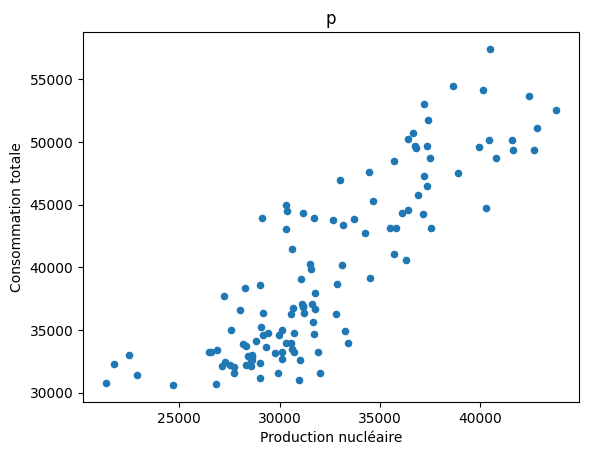

In [20]:
data.plot.scatter(x="Production nucléaire", y="Consommation totale", title="p")  #SCATTER NUAGE DE POINT

#Duplicated values

In [21]:
#s'il y avait des donnees dupliquées, on utiliserait la commande https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
#pour supprimer les dupliquées

data_net=data.drop_duplicates(keep='first')
data_net

,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,57177,42811.0,5399,741.0,691,3967,6741,1587,125,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,54419,38661.0,8721,2511.0,1309,4901,5244,1123,216,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,48583,37549.0,5276,1435.0,666,3175,3894,977,356,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,44192,33100.0,3484,1655.0,486,1343,5302,1572,329,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,40433,29058.0,1772,854.0,368,549,7706,974,454,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,40555,28449.0,1605,54.0,159,1392,5626,2295,1686,892,32959,7268.0,9252.0,2080.0,1907.0,1316.0,2090.0,1353.0,NaN
1357,39162,29010.0,957,70.0,166,720,4408,2213,1713,857,31184,7600.0,9266.0,1698.0,1878.0,1837.0,2090.0,1393.0,NaN
1370,38505,29001.0,2197,498.0,146,1552,3417,1651,1421,815,32350,5764.0,2118.0,6126.0,1114.0,1433.0,2126.0,1468.0,NaN
1383,41695,30658.0,3621,600.0,180,2840,3092,2807,703,812,36762,4291.0,2745.0,4155.0,464.0,861.0,2141.0,1873.0,NaN


In [22]:
df_num=data.select_dtypes(exclude='object')
df_num

,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,57177,42811.0,5399,741.0,691,3967,6741,1587,125,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,54419,38661.0,8721,2511.0,1309,4901,5244,1123,216,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,48583,37549.0,5276,1435.0,666,3175,3894,977,356,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,44192,33100.0,3484,1655.0,486,1343,5302,1572,329,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,40433,29058.0,1772,854.0,368,549,7706,974,454,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,40555,28449.0,1605,54.0,159,1392,5626,2295,1686,892,32959,7268.0,9252.0,2080.0,1907.0,1316.0,2090.0,1353.0,NaN
1357,39162,29010.0,957,70.0,166,720,4408,2213,1713,857,31184,7600.0,9266.0,1698.0,1878.0,1837.0,2090.0,1393.0,NaN
1370,38505,29001.0,2197,498.0,146,1552,3417,1651,1421,815,32350,5764.0,2118.0,6126.0,1114.0,1433.0,2126.0,1468.0,NaN
1383,41695,30658.0,3621,600.0,180,2840,3092,2807,703,812,36762,4291.0,2745.0,4155.0,464.0,861.0,2141.0,1873.0,NaN


#Test de normalité

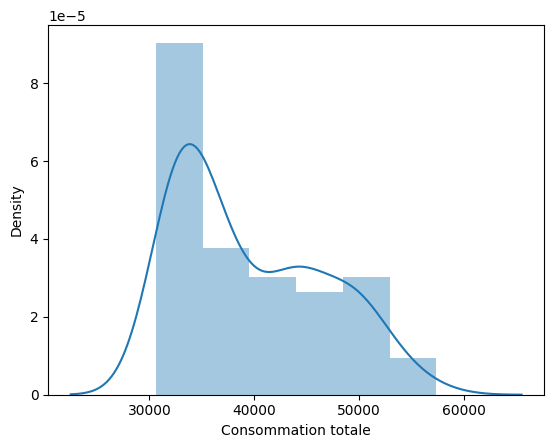

In [23]:
sns.distplot(data["Consommation totale"])
plt.show();

In [24]:
st.shapiro(energie["Consommation totale"])  #test statistique de normalite

ShapiroResult(statistic=0.908329427242279, pvalue=5.878083015886659e-07)

In [25]:
#le p-value < 0.05 alors ce n'est pas une distribution normale.

#ARIMA - SARIMAX

In [26]:
df=energie
n=energie['Consommation totale'].shape[0]

In [27]:
y = df['Consommation totale']
y

0       51086
1       54476
2       43156
3       40176
4       35257
        ...  
1344    32959
1357    31184
1370    32350
1383    36762
1396    44458
Name: Consommation totale, Length: 119, dtype: int64

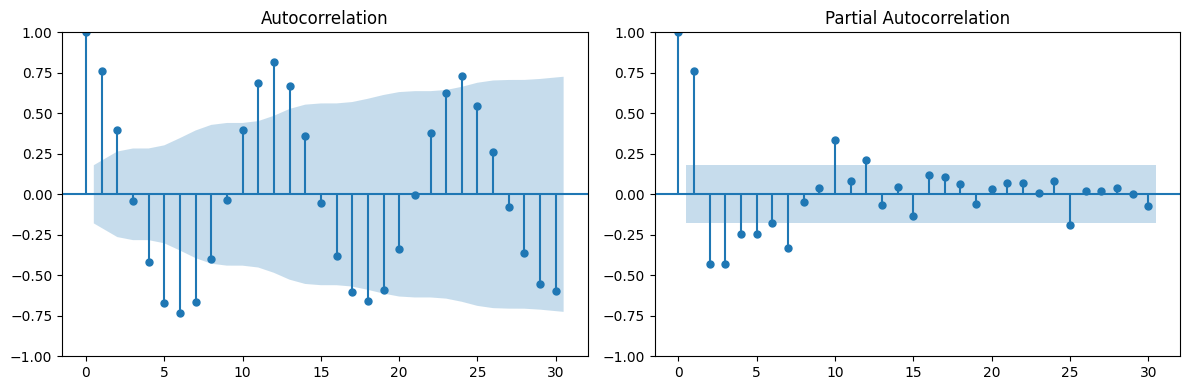

In [28]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(y, lags=30, ax=axes[0])
smt.graphics.plot_pacf(y, lags=30, ax=axes[1])
plt.tight_layout()

Puisqu'il y a suffisamment de pics dans les parcelles en dehors de la zone insignifiante (lignes horizontales pointillées), nous pouvons conclure que les résidus ne sont pas aléatoires. Cela implique qu'il y a des informations disponibles dans les résidus à extraire par les modèles AR et MA. De plus, il existe une composante saisonnière disponible dans les résidus au décalage 12 (représentée par des pointes au décalage 12). Cela a du sens puisque nous analysons des données mensuelles qui ont tendance à avoir une saisonnalité de 12 mois.

In [29]:
#Test de stationnarité (Agumented Dickey Fuller)
p_value = sm.tsa.stattools.adfuller(y)[1]
p_value

0.4067992848764901

In [30]:
X=pd.DataFrame()

X["t"]=y
X["t-1"]=y.shift(1)  #DECALLAGE 1 jour
X["t-2"]=y.shift(2)
X["t-3"]=y.shift(3)
X["t-12"]=y.shift(12)
X["t-13"]=y.shift(13)
X["t-24"]=y.shift(24)

X

,t,t-1,t-2,t-3,t-12,t-13,t-24
0,51086,NaN,NaN,NaN,NaN,NaN,NaN
1,54476,51086.0,NaN,NaN,NaN,NaN,NaN
2,43156,54476.0,51086.0,NaN,NaN,NaN,NaN
3,40176,43156.0,54476.0,51086.0,NaN,NaN,NaN
4,35257,40176.0,43156.0,54476.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1344,32959,32032.0,35007.0,37747.0,32970.0,30763.0,34629.0
1357,31184,32959.0,32032.0,35007.0,31428.0,32970.0,31564.0
1370,32350,31184.0,32959.0,32032.0,32307.0,31428.0,32213.0
1383,36762,32350.0,31184.0,32959.0,38332.0,32307.0,36367.0


In [31]:
X.corr()

,t,t-1,t-2,t-3,t-12,t-13,t-24
t,1.000000,0.771705,0.412918,-0.041912,0.910729,0.758651,0.933873
t-1,0.771705,1.000000,0.776323,0.422367,0.756055,0.912764,0.789258
t-2,0.412918,0.776323,1.000000,0.776925,0.431491,0.756705,0.469666
t-3,-0.041912,0.422367,0.776925,1.000000,-0.026377,0.433919,0.011731
t-12,0.910729,0.756055,0.431491,-0.026377,1.000000,0.779433,0.913314
t-13,0.758651,0.912764,0.756705,0.433919,0.779433,1.000000,0.775070
t-24,0.933873,0.789258,0.469666,0.011731,0.913314,0.775070,1.000000


In [32]:
# essai 1
model = SARIMAX(y, order=(1,1,1), seasonal_order=(0,2,1, 12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                Consommation totale   No. Observations:                  119
Model:             SARIMAX(1, 1, 1)x(0, 2, 1, 12)   Log Likelihood                -901.093
Date:                            Fri, 03 May 2024   AIC                           1810.185
Time:                                    06:47:45   BIC                           1820.358
Sample:                                         0   HQIC                          1814.294
                                            - 119                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3732      0.130      2.870      0.004       0.118       0.628
ma.L1         -0.8092      0.093   

In [33]:
st.shapiro(results.resid)

ShapiroResult(statistic=0.5493718981742859, pvalue=1.7911719353386508e-17)

In [34]:
#la distribution des résidus ne suit pas une loi normale.

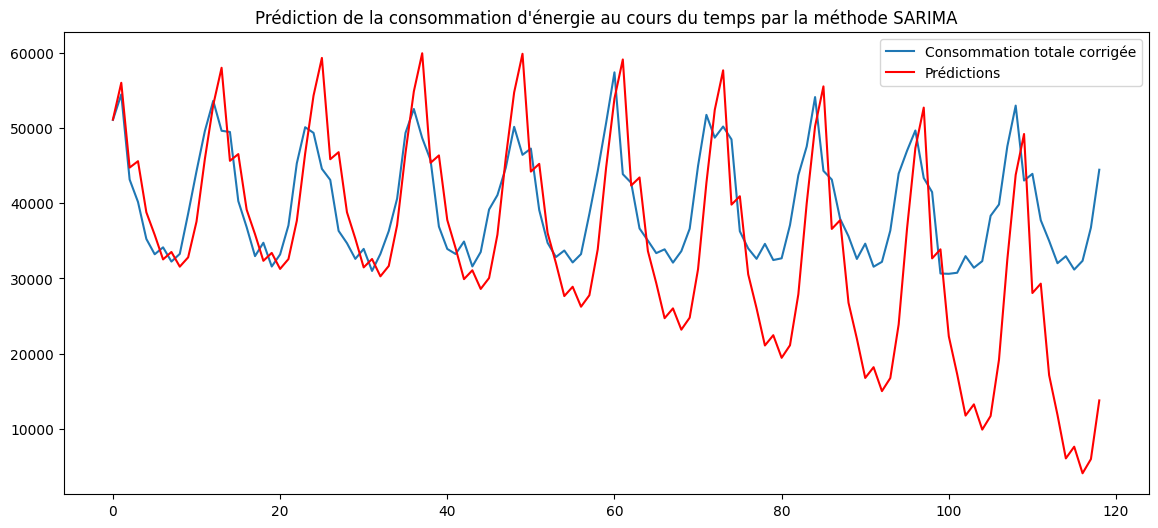

In [35]:
pred_model1 = results.get_forecast(n)
pred = pred_model1.predicted_mean
plt.figure(figsize=(14,6))

plt.plot(y.values, label='Consommation totale corrigée')

plt.plot(pred.values, color='RED', label= 'Prédictions')

plt.title('Prédiction de la consommation d\'énergie au cours du temps par la méthode SARIMA')
plt.legend()
plt.show()

In [36]:
# essai 2
model = SARIMAX(y, order=(0,1,1), seasonal_order=(0,2,1, 12))
results2 = model.fit()
print(results2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                Consommation totale   No. Observations:                  119
Model:             SARIMAX(0, 1, 1)x(0, 2, 1, 12)   Log Likelihood                -904.007
Date:                            Fri, 03 May 2024   AIC                           1814.015
Time:                                    06:47:46   BIC                           1821.645
Sample:                                         0   HQIC                          1817.097
                                            - 119                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5920      0.084     -7.038      0.000      -0.757      -0.427
ma.S.L12      -0.9934      0.143   

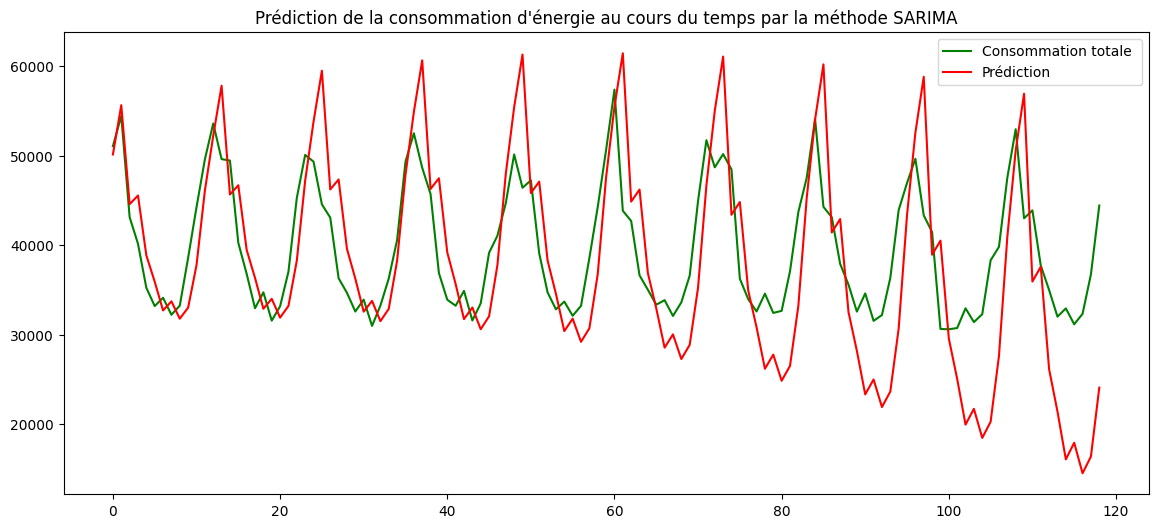

In [37]:
results2 = model.fit()
pred_model2 = results2.get_forecast(n)
pred2 = pred_model2.predicted_mean
plt.figure(figsize=(14,6))
plt.plot(y.values, color='green',label='Consommation totale ')
plt.plot(pred2.values, color='RED', label='Prédiction')
plt.title('Prédiction de la consommation d\'énergie au cours du temps par la méthode SARIMA')
plt.legend()
plt.show()

In [38]:
# essai 3
data =y
# define model configuration
my_order = (1, 1, 1) #pqd: appliquée à la seried e depart
my_seasonal_order = (1, 1, 1, 12) #PQD et S=saison (tres souvent c'est 12) appliquée à la SAISONNALITE
# define model
model = SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)
results3 = model.fit()
print(results3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                Consommation totale   No. Observations:                  119
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1003.149
Date:                            Fri, 03 May 2024   AIC                           2016.298
Time:                                    06:47:51   BIC                           2029.615
Sample:                                         0   HQIC                          2021.695
                                            - 119                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4562      0.245      1.863      0.063      -0.024       0.936
ma.L1         -0.5971      0.246   

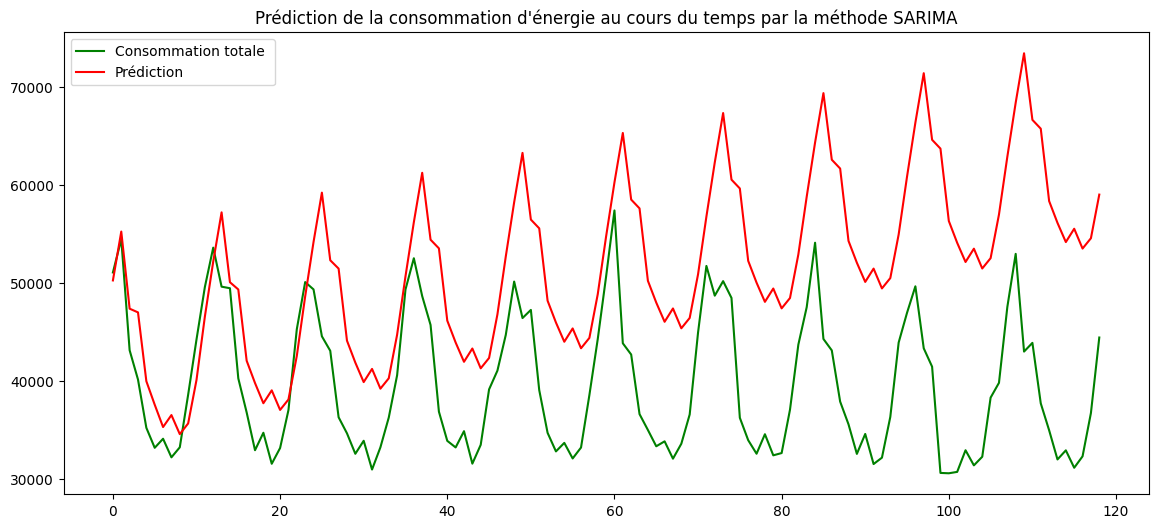

In [39]:
results3 = model.fit()
pred_model3 = results3.get_forecast(n)
pred3 = pred_model3.predicted_mean
plt.figure(figsize=(14,6))
plt.plot(y.values, color='green',label='Consommation totale ')
plt.plot(pred3.values, color='RED', label='Prédiction')
plt.title('Prédiction de la consommation d\'énergie au cours du temps par la méthode SARIMA')
plt.legend()
plt.show()

#Automatically build SARIMA in Python

In [40]:
df = pd.DataFrame(pd.read_csv("/content/sample_data/energie.csv", sep = ';'))
df.head()

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [41]:
df.rename(columns={'Mois':'Date'}, inplace = True)
df["Date"] = pd.to_datetime(df["Date"]) + MonthEnd()
df.head()

,Date,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01-31,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02-29,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03-31,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04-30,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05-31,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [42]:
df.set_index('Date', inplace=True)
df.head()

,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,1587,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
2012-02-29,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,1123,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2012-03-31,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,977,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
2012-04-30,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,1572,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
2012-05-31,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,974,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [43]:
df_fr = df[df["Territoire"] == "France"]
df_fr.head()

,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,1587,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
2012-02-29,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,1123,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2012-03-31,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,977,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
2012-04-30,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,1572,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
2012-05-31,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,974,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [44]:
!pip install pmdarima
#! conda install -c conda-forge pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.1 MB/s eta 0:00:00


In [45]:
import pmdarima as pm
#comment choisir les bonnes variables pour le modele SARIMA(p,q,d)(P,Q,D,S)

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=2, max_q=2, m=12,
                         start_P=0, seasonal=True,
                         d=None, max_P=1, max_Q=1, max_D=1,
                       #######
                         trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(smodel.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=2312.076, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2449.590, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2292.125, Time=0.73 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2326.320, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2863.078, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2344.756, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2316.598, Time=0.42 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=2449.177, Time=0.20 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2291.013, Time=1.90 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2320.629, Time=0.19 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=2303.719, Time=0.56 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=inf, Time=3.06 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept  

In [46]:
import plotly.express as px

data3=df_fr[["Production totale","Production nucléaire","Consommation totale"]]
fig = px.line(data3, facet_col="variable", facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.show()

In [47]:
fig = px.area(data3, facet_col='variable',facet_col_wrap=1)
#fig.update_yaxes(matches=None)
fig.show()

In [48]:
df_train_transformed = data3.diff().diff().dropna()
#dropna permet d enlever les valeurs manquantes

fig = px.line(df_train_transformed, facet_col="variable", facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.show()

#SARIMAX

In [49]:
df_fr = df[df["Territoire"] == "France"].drop(columns=["Qualité","Territoire"])
df_fr = df_fr.rename_axis('temps', axis=1)
df_fr.head()

temps,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
Date,,,,,,,,,,,,,,,,,,,
2012-01-31,57177,42811.0,5399,741.0,691,3967,6741,1587,125,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
2012-02-29,54419,38661.0,8721,2511.0,1309,4901,5244,1123,216,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2012-03-31,48583,37549.0,5276,1435.0,666,3175,3894,977,356,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
2012-04-30,44192,33100.0,3484,1655.0,486,1343,5302,1572,329,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
2012-05-31,40433,29058.0,1772,854.0,368,549,7706,974,454,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [50]:
df_fr.shape

(119, 19)

#Granger Causality Test

In [51]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df_fr[["Consommation totale", "Production totale"]],maxlag=15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9724  , p=0.1629  , df_denom=115, df_num=1
ssr based chi2 test:   chi2=2.0239  , p=0.1548  , df=1
likelihood ratio test: chi2=2.0067  , p=0.1566  , df=1
parameter F test:         F=1.9724  , p=0.1629  , df_denom=115, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9360  , p=0.1491  , df_denom=112, df_num=2
ssr based chi2 test:   chi2=4.0449  , p=0.1323  , df=2
likelihood ratio test: chi2=3.9766  , p=0.1369  , df=2
parameter F test:         F=1.9360  , p=0.1491  , df_denom=112, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.8020  , p=0.0123  , df_denom=109, df_num=3
ssr based chi2 test:   chi2=12.1386 , p=0.0069  , df=3
likelihood ratio test: chi2=11.5446 , p=0.0091  , df=3
parameter F test:         F=3.8020  , p=0.0123  , df_denom=109, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7941  , p=0.0298  

{1: ({'ssr_ftest': (1.972396721385926, 0.16288881092859428, 115.0, 1),
   'ssr_chi2test': (2.023850548900341, 0.15484604895465037, 1),
   'lrtest': (2.0066906706942973, 0.15660660869627405, 1),
   'params_ftest': (1.9723967213859313, 0.16288881092859342, 115.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.9360326210459584, 0.14907314028176108, 112.0, 2),
   'ssr_chi2test': (4.044925297542449, 0.13232918318579748, 2),
   'lrtest': (3.976575564909126, 0.13692967823999536, 2),
   'params_ftest': (1.9360326210459915, 0.14907314028175683, 112.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.802042178965523, 0.012295420522084991, 109.0, 3),
   'ssr_chi2test': (12.138630075963324, 0.00692304982636915, 3),
   'lrtest': (11.544613968235808, 0.009117636372977493, 3),
   'params_ftest': (3.8020421789655923, 0.01229542052208382, 109.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.,

In [89]:
#H0: il y'a pas de "causalité"
#si pvalue<5% on rejette h0 et donc il y'a causalité
#grangercausalitytests(df_fr[["Consommation totale", "Production totale"]],maxlag=15)
#
maxlag=15
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [85]:
df_fr.shape

(119, 19)

In [90]:
data4=df_fr[df_fr.columns[0:20]].dropna()

In [91]:
grangers_causation_matrix(data4, variables = data4.columns)

,Production totale_x,Production nucléaire_x,Production thermique totale_x,Production thermique charbon_x,Production thermique fioul_x,Production thermique gaz_x,Production hydraulique_x,Production éolien_x,Production solaire_x,Production bioénergies_x,Consommation totale_x,Solde exportateur_x,Echanges export_x,Echanges import_x,Echanges avec le Royaume-Uni_x,Echanges avec l'Espagne_x,Echanges avec l'Italie_x,Echanges avec la Suisse_x,Echanges avec l'Allemagne et la Belgique_x
Production totale_y,1.0000,0.0000,0.0001,0.0406,0.0003,0.0000,0.0000,0.0001,0.0000,0.0002,0.0002,0.0002,0.0012,0.0001,0.0003,0.0195,0.0144,0.0693,0.0008
Production nucléaire_y,0.0000,1.0000,0.0002,0.0179,0.0168,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0017,0.0001,0.0000,0.0047,0.0003,0.0333,0.0005
Production thermique totale_y,0.0000,0.0000,1.0000,0.0000,0.0425,0.0000,0.0000,0.0000,0.0000,0.0011,0.0000,0.0040,0.0006,0.1887,0.0000,0.0095,0.0000,0.0001,0.0445
Production thermique charbon_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0228,0.0022,0.0003,0.0000,0.0000,0.0291,0.2217,0.0003,0.0047,0.0145,0.0054,0.0225,0.0199
Production thermique fioul_y,0.0000,0.0000,0.0000,0.0015,1.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0851,0.1130,0.0242,0.0010,0.0000,0.0001,0.0028,0.0070
Production thermique gaz_y,0.0000,0.0000,0.0000,0.0000,0.0411,1.0000,0.0000,0.0000,0.0000,0.0004,0.0000,0.0062,0.0003,0.0235,0.0000,0.0000,0.0000,0.0000,0.0213
Production hydraulique_y,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,1.0000,0.0039,0.0000,0.0002,0.0000,0.0027,0.0082,0.0001,0.0027,0.0000,0.0476,0.0001,0.0000
Production éolien_y,0.0000,0.0000,0.0000,0.0000,0.0021,0.0000,0.0000,1.0000,0.0000,0.0005,0.0000,0.0000,0.0003,0.0000,0.0001,0.0016,0.1197,0.0001,0.0000
Production solaire_y,0.0000,0.0000,0.0067,0.0006,0.0001,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0020,0.0001,0.0115,0.0020,0.0039,0.0046,0.0005,0.0017
Production bioénergies_y,0.0000,0.0000,0.0000,0.0000,0.0158,0.0000,0.0000,0.0003,0.0000,1.0000,0.0000,0.0137,0.0204,0.0287,0.0020,0.0020,0.0000,0.0001,0.0000


In [83]:
grangers_causation_matrix(data4, variables = data4.columns).loc["Consommation totale_y"]

Production totale_x                           0.0004
Production nucléaire_x                        0.0002
Production thermique totale_x                 0.0000
Production thermique charbon_x                0.0004
Production thermique fioul_x                  0.0000
Production thermique gaz_x                    0.0000
Production hydraulique_x                      0.0000
Production éolien_x                           0.0000
Production solaire_x                          0.0000
Production bioénergies_x                      0.0002
Consommation totale_x                         1.0000
Solde exportateur_x                           0.0006
Echanges export_x                             0.0025
Echanges import_x                             0.0002
Echanges avec le Royaume-Uni_x                0.0000
Echanges avec l'Espagne_x                     0.0627
Echanges avec l'Italie_x                      0.0068
Echanges avec la Suisse_x                     0.0496
Echanges avec l'Allemagne et la Belgique_x    

In [56]:
data5=df_fr #.select_dtypes(include=['float64'])
data5.head()

temps,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
Date,,,,,,,,,,,,,,,,,,,
2012-01-31,57177,42811.0,5399,741.0,691,3967,6741,1587,125,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
2012-02-29,54419,38661.0,8721,2511.0,1309,4901,5244,1123,216,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2012-03-31,48583,37549.0,5276,1435.0,666,3175,3894,977,356,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
2012-04-30,44192,33100.0,3484,1655.0,486,1343,5302,1572,329,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
2012-05-31,40433,29058.0,1772,854.0,368,549,7706,974,454,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [57]:
data5.shape

(119, 19)

In [58]:
target = data5["Consommation totale"]
target.head()

Date
2012-01-31    51086
2012-02-29    54476
2012-03-31    43156
2012-04-30    40176
2012-05-31    35257
Name: Consommation totale, dtype: int64

In [59]:
exog = data5[["Production totale","Production nucléaire","Production thermique totale","Production thermique charbon"]]
exog.head()

temps,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon
Date,,,,
2012-01-31,57177,42811.0,5399,741.0
2012-02-29,54419,38661.0,8721,2511.0
2012-03-31,48583,37549.0,5276,1435.0
2012-04-30,44192,33100.0,3484,1655.0
2012-05-31,40433,29058.0,1772,854.0


In [60]:
n_periods=19
target_train= target.drop(target.index[-n_periods:])
target_test=target[-n_periods:]

In [61]:
exog_train= exog.drop(exog.index[-n_periods:])
exog_test=exog[-n_periods:]

In [62]:
target_test.shape

(19,)

In [63]:
target_train.shape

(100,)

In [64]:
#ARIMA(p=1,d=0,q=1)(P=2,D=1,Q=0)[m=12]

# define model configuration
my_order = (1, 0, 1) #pqd: appliquée à la seried e depart
my_seasonal_order = (2, 1, 0, 12) #PQD et S=saison (tres souvent c'est 12) appliquée à la SAISONNALITE
# define model
model5 = SARIMAX(target_train,exog=exog_train, order=my_order, seasonal_order=my_seasonal_order)
#exog:on ajoute les variables explocatives
results5 = model5.fit(disp=True)
print(results5.summary())

                                      SARIMAX Results                                      
Dep. Variable:                 Consommation totale   No. Observations:                  100
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                -740.432
Date:                             Fri, 03 May 2024   AIC                           1498.865
Time:                                     06:49:44   BIC                           1521.161
Sample:                                 01-31-2012   HQIC                          1507.847
                                      - 04-30-2020                                         
Covariance Type:                               opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Production totale                0.9032      0.176      5.124      0.0

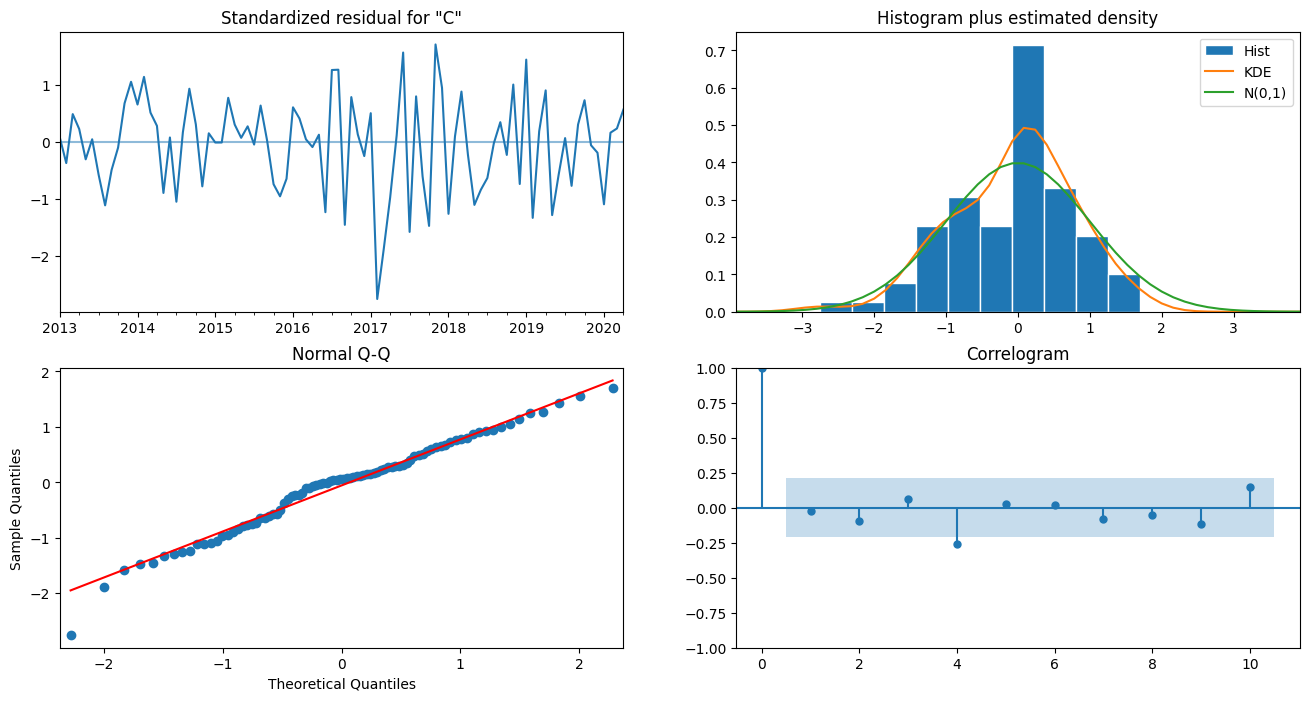

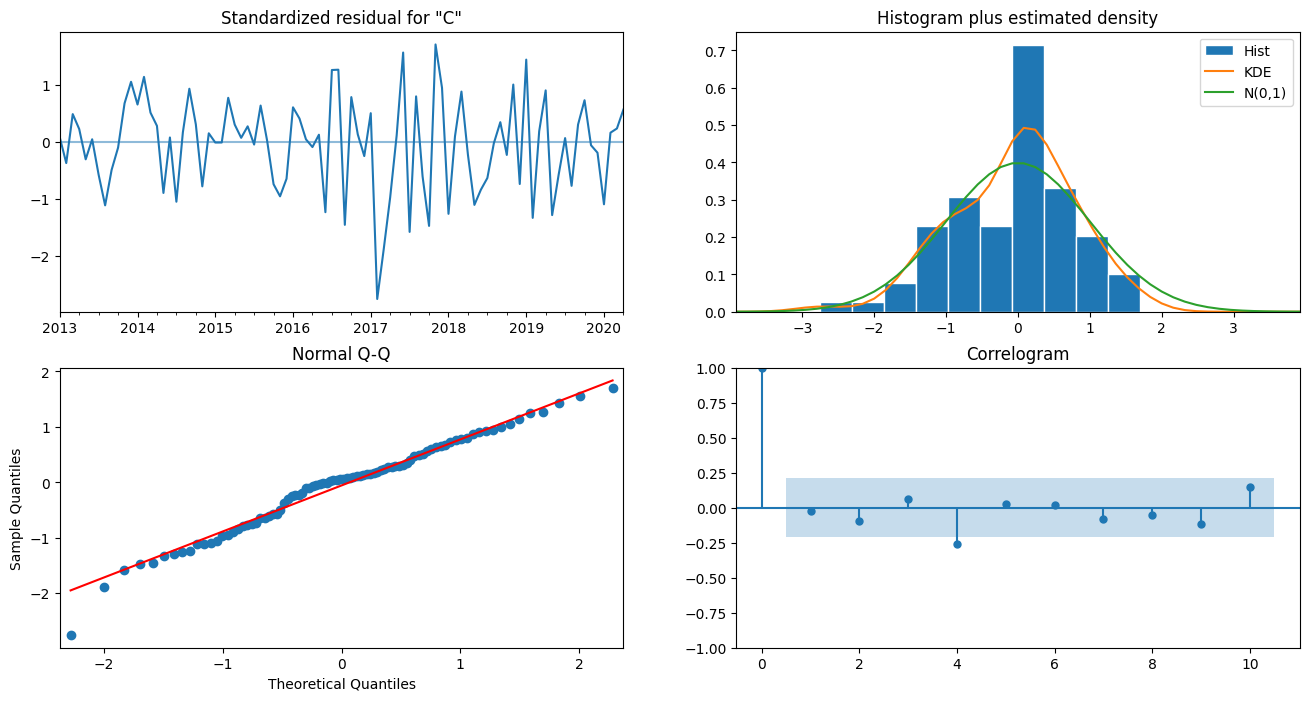

In [65]:
results5.plot_diagnostics(figsize=(16,8))

In [66]:
exog_test.head(1)

temps,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon
Date,,,,
2020-05-31,37664,24714.0,1235,54.0


In [67]:
exog

temps,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon
Date,,,,
2012-01-31,57177,42811.0,5399,741.0
2012-02-29,54419,38661.0,8721,2511.0
2012-03-31,48583,37549.0,5276,1435.0
2012-04-30,44192,33100.0,3484,1655.0
2012-05-31,40433,29058.0,1772,854.0
...,...,...,...,...
2021-07-31,40555,28449.0,1605,54.0
2021-08-31,39162,29010.0,957,70.0
2021-09-30,38505,29001.0,2197,498.0


In [68]:
predictions=results5.forecast(steps=119, exog = exog)
predictions

2020-05-31    51664.207969
2020-06-30    55383.700952
2020-07-31    44310.225904
2020-08-31    39846.201901
2020-09-30    33813.823832
                  ...     
2029-11-30    33709.647530
2029-12-31    32012.778100
2030-01-31    32857.367521
2030-02-28    35803.861179
2030-03-31    41499.962460
Freq: M, Name: predicted_mean, Length: 119, dtype: float64

In [69]:
predictions=results5.forecast(steps=119, exog = exog)
yhatsarimax=predictions

In [70]:
target

Date
2012-01-31    51086
2012-02-29    54476
2012-03-31    43156
2012-04-30    40176
2012-05-31    35257
              ...  
2021-07-31    32959
2021-08-31    31184
2021-09-30    32350
2021-10-31    36762
2021-11-30    44458
Name: Consommation totale, Length: 119, dtype: int64

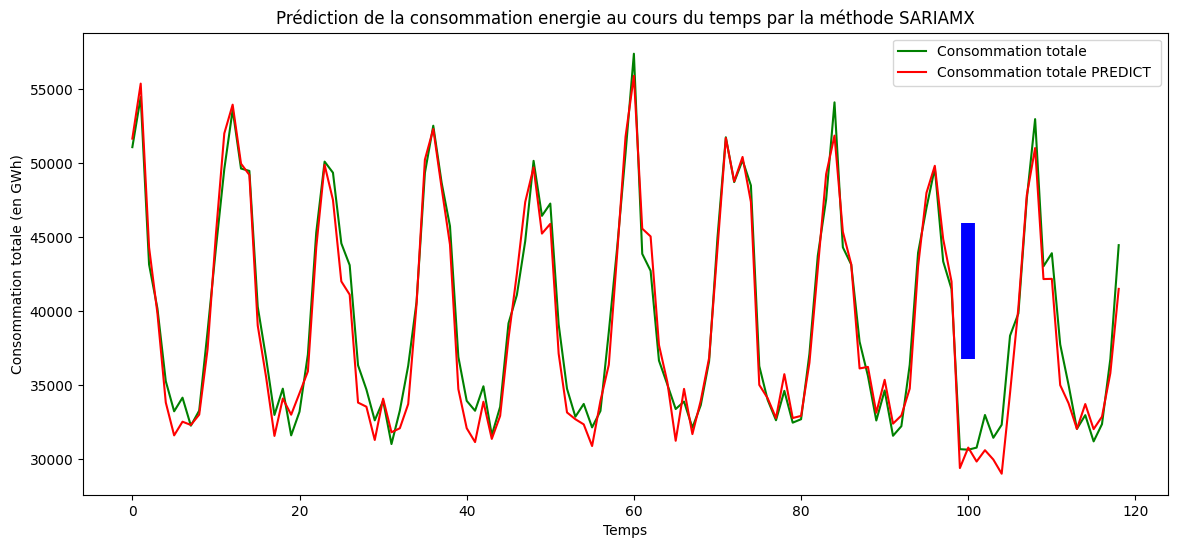

In [71]:
plt.figure(figsize=(14,6))
plt.plot(target.values, label='Consommation totale', color='green')

plt.plot(predictions.values, label='Consommation totale PREDICT ', color='red')

plt.vlines(x = 100, ymin =target.min()*1.2, ymax = 0.8*target.max(), colors = 'blue',linestyles = "solid",linewidth=10)
plt.ylabel('Consommation totale (en GWh)')
plt.xlabel('Temps')
plt.title('Prédiction de la consommation energie au cours du temps par la méthode SARIAMX')
plt.legend(loc='best')
plt.show()

In [72]:
y_pred5=predictions.values[-19:]
y_pred5

array([30765.31775954, 29822.30839939, 30587.95038893, 29956.56954125,
       28997.07393702, 34455.36733775, 40238.27342165, 47815.71864619,
       51025.61124831, 42163.33925391, 42178.37603942, 34990.87584917,
       33764.03132491, 32026.46776578, 33709.6475301 , 32012.77810022,
       32857.36752068, 35803.86117943, 41499.96246013])

In [73]:
y_true5=target.values[-19:]
y_true5

array([30622, 30763, 32970, 31428, 32307, 38332, 39840, 47565, 52983,
       43024, 43913, 37747, 35007, 32032, 32959, 31184, 32350, 36762,
       44458])

In [74]:
mean_error = (y_true5- y_pred5)/np.mean(y_true5)*100
mean_error

array([-0.38556501,  2.53072448,  6.40838215,  3.958561  ,  8.90463028,
       10.42923012, -1.07146731, -0.67450354,  5.26592523,  2.31541901,
        4.6666254 ,  7.41474768,  3.34393467,  0.01488326, -2.01945258,
       -2.22964575, -1.36496106,  2.5776624 ,  7.95795137])

In [75]:
mae = mean_absolute_error(y_true5, y_pred5)
mse = mean_squared_error(y_true5, y_pred5)
rmse = np.sqrt(mse) #root mean squared error
mape = np.mean(np.abs((y_true5 - y_pred5) / y_pred5)) * 100 #mean absolute percentage error

print('MAE = ', mae)
print('MSE = ', mse)
print('RMSE = ', rmse)
print('MAPE = ', mape)

MAE =  1438.595171208695
MSE =  3307795.4868174265
RMSE =  1818.7345839394561
MAPE =  4.117292525348694


In [76]:
st.shapiro(results5.resid)
#pvalue>5% donc on ne peut pas rejeter l'hypothese de normalité des residus
#conslusion sur la base des statisqteues: ON VALIDE LE MODELE

ShapiroResult(statistic=0.9856890439987183, pvalue=0.3556458353996277)

In [77]:
predictions=results5.get_forecast(steps=119, exog = exog).summary_frame()
predictions.index=exog.index

In [78]:
predictions['reality']=target
predictions

Consommation totale,mean,mean_se,mean_ci_lower,mean_ci_upper,reality
Date,,,,,
2012-01-31,51664.207969,1248.408735,49217.371810,54111.044128,51086
2012-02-29,55383.700952,1395.426446,52648.715375,58118.686529,54476
2012-03-31,44310.225904,1443.109032,41481.784175,47138.667634,43156
2012-04-30,39846.201901,1459.347257,36985.933837,42706.469966,40176
2012-05-31,33813.823832,1464.959435,30942.556102,36685.091563,35257
...,...,...,...,...,...
2021-07-31,33709.647530,2567.382615,28677.670070,38741.624990,32959
2021-08-31,32012.778100,2567.415812,26980.735575,37044.820626,31184
2021-09-30,32857.367521,2567.427372,27825.302339,37889.432703,32350


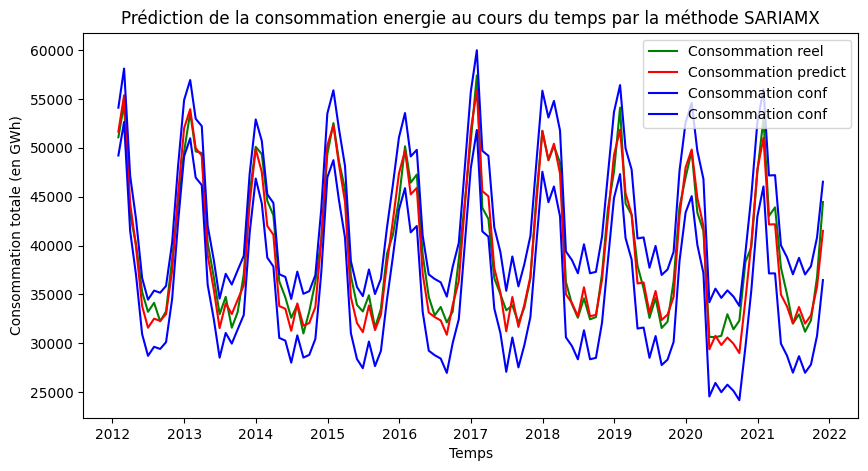

In [79]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(predictions[['reality']], label='Consommation reel', color='green')
plt.plot(predictions[['mean']], label='Consommation predict', color='red')

plt.plot(predictions[['mean_ci_lower', 'mean_ci_upper']], label='Consommation conf', color='blue')
#plt.vlines(x = 100, ymin =target.min()*1.2, ymax = 0.8*target.max(), colors = 'blue',linestyles = "solid",linewidth=10)
plt.ylabel('Consommation totale (en GWh)')
plt.xlabel('Temps')
plt.title('Prédiction de la consommation energie au cours du temps par la méthode SARIAMX')
plt.legend(loc='best')
plt.show()